In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from vis_settings import flux_types as colors
from vis_settings import panel_titles, line_labels

In [2]:
df_emissions=pd.read_csv('emissions_time_series_pulse.csv')
df_emissions_20yr=pd.read_csv('emissions_time_series_20yr.csv')

# Figure 1

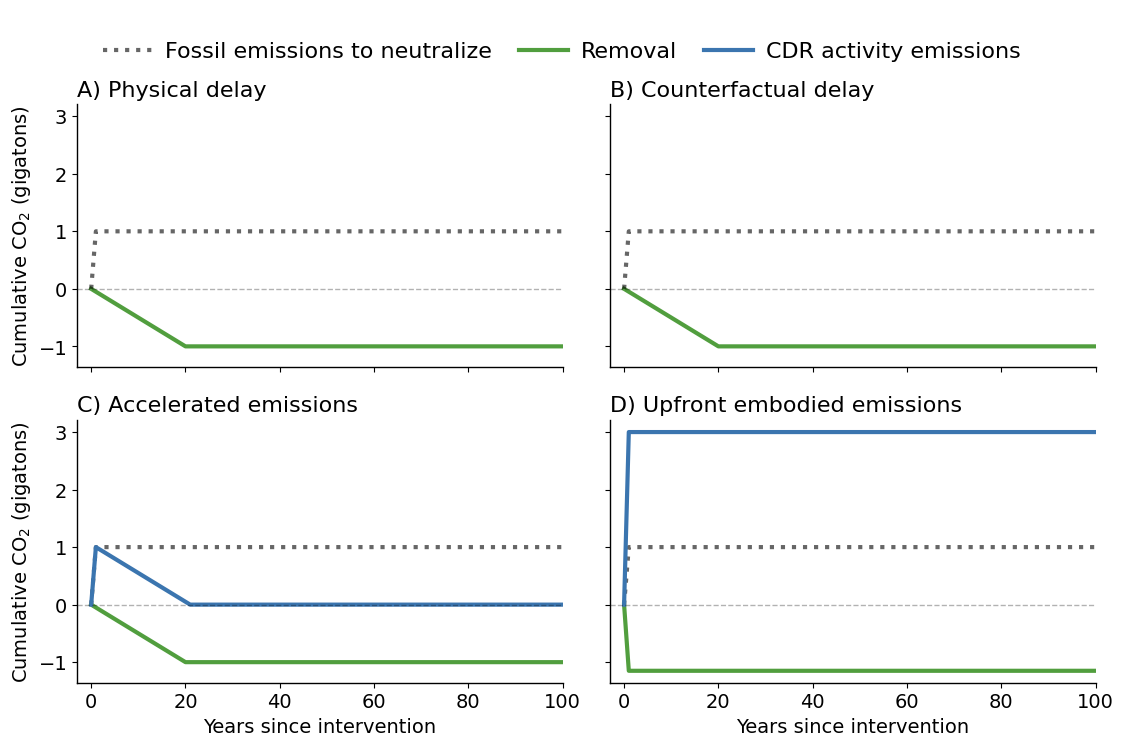

In [11]:
lwidth=3

plt.style.use('default')
mpl.rcParams.update({
        'font.family'    : 'DejaVu Sans',
        'axes.grid'      : False,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth' : 1.0,
        'legend.frameon' : False,
        "font.size": 16,        # base font
        "axes.titlesize": 18,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "lines.linewidth": 3,
    })


def format_subplot():
    plt.xlim([-3,100])
    plt.axhline(y=0,linestyle='--',color='k', alpha=0.3, linewidth=1)

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,8), sharex=True, sharey=True)

plt.subplot(2,2,1)
plt.plot(df_emissions['co2_cumulative_delay'], linewidth=lwidth, color=colors['removal'])
plt.plot(df_emissions['baseline_emission'], color='k',alpha=0.6, linewidth=lwidth, linestyle=':')
plt.title(panel_titles[0], loc="left", fontsize=16)
plt.ylabel("Cumulative CO$_2$ (gigatons)", fontsize=14)

format_subplot()

plt.subplot(2,2,2)
plt.plot(df_emissions['co2_cumulative_delay'], linewidth=lwidth, color=colors['removal'])
plt.plot(df_emissions['baseline_emission'], color='k',alpha=0.6, linewidth=lwidth, linestyle=':')
plt.title(panel_titles[1], loc="left", fontsize=16)
format_subplot()

plt.subplot(2,2,3)
plt.plot(df_emissions['baseline_emission'], color='k',alpha=0.6, linewidth=lwidth, linestyle=':')
plt.plot(df_emissions['co2_cumulative_delay'], linewidth=lwidth, color=colors['removal'])
plt.plot(df_emissions['co2_accelerated_emission'], linewidth=lwidth, color=colors['activity-emission'])
plt.title(panel_titles[2], loc="left", fontsize=16)
plt.ylabel("Cumulative CO$_2$ (gigatons)", fontsize=14)
plt.xlabel("Years since intervention", fontsize=14)
format_subplot()

plt.subplot(2,2,4)
line1,=plt.plot(df_emissions['baseline_emission'], 
                color='k',alpha=0.6, linewidth=lwidth, label=line_labels['baseline'], linestyle=':')
line2,=plt.plot(df_emissions['upfront_removal_yr1'], 
                linewidth=lwidth, label=line_labels['removal'], color=colors['removal'])
line3,=plt.plot(df_emissions['upfront_emissions_yr1'], 
                linewidth=lwidth, label=line_labels['activity-emission'], color=colors['activity-emission'])

#plt.legend()
shared_handles = [line1, line2, line3]
shared_labels = [line_labels['baseline'],
                 line_labels['removal'], 
                 line_labels['activity-emission']]
plt.title(panel_titles[3], loc="left", fontsize=16)
plt.xlabel("Years since intervention", fontsize=14)

seen = set()
uniq_handles, uniq_labels = [], []
for h, l in zip(shared_handles, shared_labels):
    if l not in seen:
        uniq_handles.append(h); uniq_labels.append(l); seen.add(l)

if len(uniq_labels) > 0:
    fig.legend(uniq_handles, uniq_labels, loc='upper center',
               ncol=len(uniq_labels), borderaxespad=1.5,
               handlelength=2.2, handletextpad=0.6, columnspacing=1.2)

fig.tight_layout(rect=[0.02, 0.02, 0.98, 0.90])

format_subplot()
plt.savefig(fname="../figures/Figure1.pdf")
plt.savefig(fname="../figures/Figure1.png")

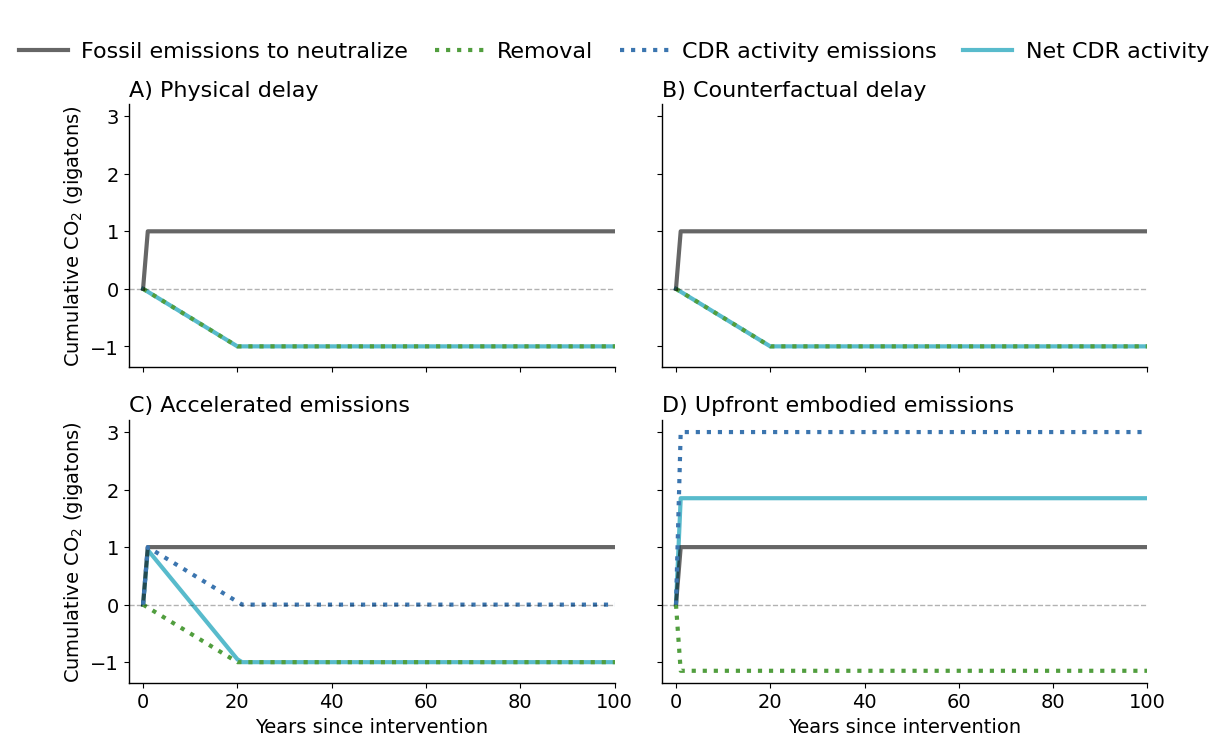

In [12]:
lwidth=3

plt.style.use('default')
mpl.rcParams.update({
        'font.family'    : 'DejaVu Sans',
        'axes.grid'      : False,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.linewidth' : 1.0,
        'legend.frameon' : False,
        "font.size": 16,        # base font
        "axes.titlesize": 18,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "lines.linewidth": 3,
    })


def format_subplot():
    plt.xlim([-3,100])
    plt.axhline(y=0,linestyle='--',color='k', alpha=0.3, linewidth=1)

fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(12,8), sharex=True, sharey=True)

plt.subplot(2,2,1)
plt.plot(df_emissions['co2_cumulative_delay'], 
         color=colors['net-effect'],linewidth=lwidth)
plt.plot(df_emissions['co2_cumulative_delay'], linewidth=lwidth, color=colors['removal'], linestyle=':')
plt.plot(df_emissions['baseline_emission'], color='k',alpha=0.6, linewidth=lwidth)
plt.title(panel_titles[0], loc="left", fontsize=16)
plt.ylabel("Cumulative CO$_2$ (gigatons)", fontsize=14)

format_subplot()

plt.subplot(2,2,2)
plt.plot(df_emissions['co2_cumulative_delay'], 
         color=colors['net-effect'],linewidth=lwidth)
plt.plot(df_emissions['co2_cumulative_delay'], linewidth=lwidth, color=colors['removal'], linestyle=':')
plt.plot(df_emissions['baseline_emission'], color='k',alpha=0.6, linewidth=lwidth)
plt.title(panel_titles[1], loc="left", fontsize=16)
format_subplot()

plt.subplot(2,2,3)
plt.plot(df_emissions['co2_cumulative_delay']+df_emissions['co2_accelerated_emission'], 
         color=colors['net-effect'],linewidth=lwidth)
plt.plot(df_emissions['baseline_emission'], color='k',alpha=0.6, linewidth=lwidth)
plt.plot(df_emissions['co2_cumulative_delay'], linewidth=lwidth, color=colors['removal'], linestyle=':')
plt.plot(df_emissions['co2_accelerated_emission'], linewidth=lwidth, color=colors['activity-emission'], linestyle=':')
plt.title(panel_titles[2], loc="left", fontsize=16)
plt.ylabel("Cumulative CO$_2$ (gigatons)", fontsize=14)
plt.xlabel("Years since intervention", fontsize=14)
format_subplot()

plt.subplot(2,2,4)
line4,=plt.plot(df_emissions['upfront_removal_yr1']+df_emissions['upfront_emissions_yr1'], 
         color=colors['net-effect'],linewidth=lwidth)
line1,=plt.plot(df_emissions['baseline_emission'], 
                color='k',alpha=0.6, linewidth=lwidth, label=line_labels['baseline'])
line2,=plt.plot(df_emissions['upfront_removal_yr1'], 
                linewidth=lwidth, label=line_labels['removal'], color=colors['removal'], linestyle=':')
line3,=plt.plot(df_emissions['upfront_emissions_yr1'], 
                linewidth=lwidth, label=line_labels['activity-emission'], color=colors['activity-emission'], linestyle=':')

#plt.legend()
shared_handles = [line1, line2, line3, line4]
shared_labels = [line_labels['baseline'],
                 line_labels['removal'], 
                 line_labels['activity-emission'],
                line_labels['net-effect']]
plt.title(panel_titles[3], loc="left", fontsize=16)
plt.xlabel("Years since intervention", fontsize=14)

seen = set()
uniq_handles, uniq_labels = [], []
for h, l in zip(shared_handles, shared_labels):
    if l not in seen:
        uniq_handles.append(h); uniq_labels.append(l); seen.add(l)

if len(uniq_labels) > 0:
    fig.legend(uniq_handles, uniq_labels, loc='upper center',
               ncol=len(uniq_labels), borderaxespad=1.5,
               handlelength=2.2, handletextpad=0.6, columnspacing=1.2)

fig.tight_layout(rect=[0.02, 0.02, 0.98, 0.90])

format_subplot()
plt.savefig(fname="../figures/Figure1_v2.pdf")
plt.savefig(fname="../figures/Figure1_v2.png")